<a href="https://colab.research.google.com/github/Yash-Kamtekar/Data-Mining/blob/main/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing all the libraries**

In [113]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

# **Tabular Data Set**

## **loading the wine data set from sk learn**

In [114]:
from sklearn.datasets import load_wine

wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [115]:
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

get the classs

In [116]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

check the data.

The data frame has 178 rows and 13 columns.

In [117]:
data = pd.DataFrame(data = wine.data, columns = wine.feature_names)
data.head

<bound method NDFrame.head of      alcohol  malic_acid   ash  ...   hue  od280/od315_of_diluted_wines  proline
0      14.23        1.71  2.43  ...  1.04                          3.92   1065.0
1      13.20        1.78  2.14  ...  1.05                          3.40   1050.0
2      13.16        2.36  2.67  ...  1.03                          3.17   1185.0
3      14.37        1.95  2.50  ...  0.86                          3.45   1480.0
4      13.24        2.59  2.87  ...  1.04                          2.93    735.0
..       ...         ...   ...  ...   ...                           ...      ...
173    13.71        5.65  2.45  ...  0.64                          1.74    740.0
174    13.40        3.91  2.48  ...  0.70                          1.56    750.0
175    13.27        4.28  2.26  ...  0.59                          1.56    835.0
176    13.17        2.59  2.37  ...  0.60                          1.62    840.0
177    14.13        4.10  2.74  ...  0.61                          1.60    560.

## **PCA**

importing pca library

In [118]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler =  StandardScaler()

In [119]:
scaler.fit(data.values)
scaled_data = scaler.transform(data.values)
scaled_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [120]:
pca = PCA(n_components = 2)
transformed_data = pca.fit_transform(scaled_data)
transformed_data

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082],
       [ 3.05025392, -2.12240111],
       [ 2.44908967, -1.17485013],
       [ 2.05943687, -1.60896307],
       [ 2.5108743 , -0.91807096],
       [ 2.75362819, -0.78943767],
       [ 3.47973668, -1.30233324],
       [ 1.7547529 , -0.61197723],
       [ 2.11346234, -0.67570634],
       [ 3.45815682, -1.13062988],
       [ 4.31278391, -2.09597558],
       [ 2.3051882 , -1.66255173],
       [ 2.17195527, -2.32730534],
       [ 1.89897118, -1.63136888],
       [ 3.54198508, -2.51834367],
       [ 2.0845222 , -1.06113799],
       [ 3.12440254, -0.78689711],
       [ 1.08657007, -0.24174355],
       [ 2.53522408,  0.09184062],
       [ 1.64498834,  0.51627893],
       [ 1.76157587,  0.31714893],
       [ 0.9900791 , -0.94066734],
       [ 1.77527763, -0.68617513],
       [ 1.23542396,  0.08980704],
       [ 2.18840633,

Variance captured by first 2 Components

In [121]:
np.cumsum(pca.explained_variance_ratio_ * 100)

array([36.1988481 , 55.40633836])

Lets plot a graph to visualise how the varaiance capture changes as we increase the number of components.

we can see that these 2 components cover approximately around 60% of the variance. This shows that we will not be able to recover all the essential characteristics of the data.
So we need to take 8 components as that covers approximately 90% of the variance.

Text(0, 0.5, 'Explained Variance')

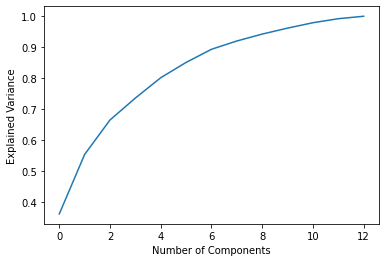

In [122]:
pca = PCA()
entire_data_pca = pca.fit_transform(scaled_data)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')

Text(0, 0.5, 'PCA Feature 2')

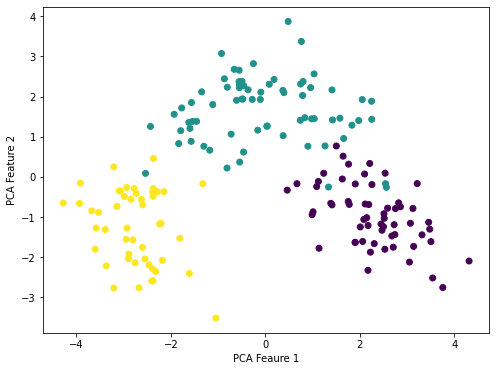

In [123]:
plt.figure(figsize=(8, 6))
plt.scatter(entire_data_pca[:,0], entire_data_pca[:,1], c = wine['target'])
plt.xlabel('PCA Feaure 1')
plt.ylabel('PCA Feature 2')

## **SVD**

importing svd library

In [124]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components = 2)
data_svd = svd.fit_transform(data.values)

99.97% of the variance is covered for 2 components.

So we can use this transformed data for 2 components for our model because of the variance covered for 2 components.

In [125]:
 np.cumsum(svd.explained_variance_ratio_ * 100)[1]

99.97221592711529

Text(0, 0.5, 'SVD Feature 2')

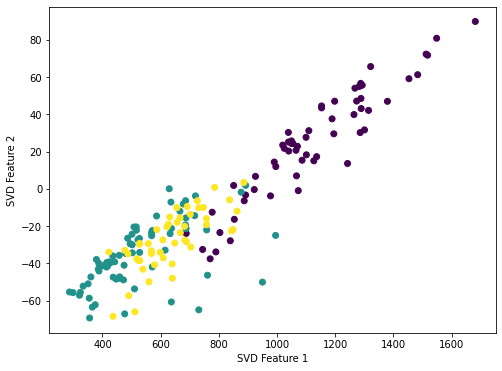

In [126]:
plt.figure(figsize=(8, 6))
plt.scatter(data_svd[:,0], data_svd[:,1], c = wine['target'])
plt.xlabel('SVD Feature 1')
plt.ylabel('SVD Feature 2')

## **LLE**

importing lle library

**Modified Locally-Linear Embedding(MLLE)** – Modified LLE (MLLE) is another LLE variant in the local weight matrix addressed by multiple weights of each neighbourhood. This process leads to distortions in LLE maps. More formally we can say that if the generated weights from the basic LLE are orthogonally projected we can consider them as multiple weights.

In [127]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components = 2, n_neighbors = 10, method = "modified")
data_lle = lle.fit_transform(data.values)

Text(0, 0.5, 'LLE Feature 2')

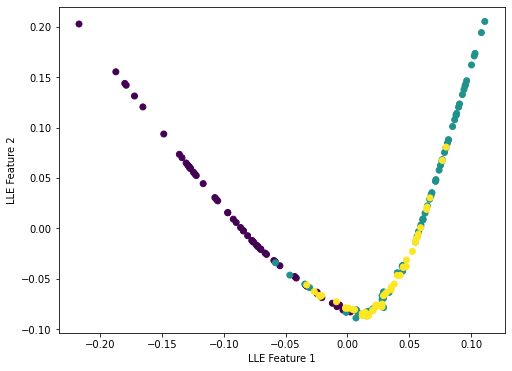

In [128]:
plt.figure(figsize = (8, 6))
plt.scatter(data_lle[:,0], data_lle[:,1], c = wine['target'])
plt.xlabel('LLE Feature 1')
plt.ylabel('LLE Feature 2')

## **t-SNE**

importing library

In [129]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
entire_data_tsne = tsne.fit_transform(data.values)

Text(0, 0.5, 'TSNE Feature 2')

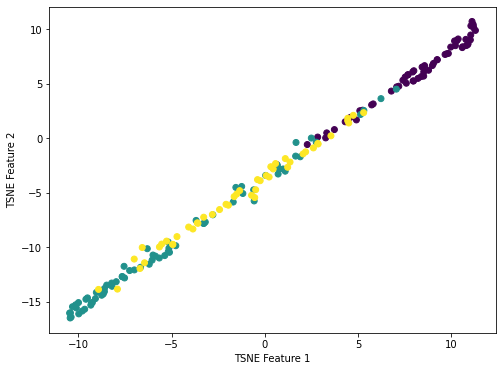

In [130]:
plt.figure(figsize = (8, 6))
plt.scatter(entire_data_tsne[:,0], entire_data_tsne[:,1], c = wine['target'])
plt.xlabel('TSNE Feature 1')
plt.ylabel('TSNE Feature 2')

## **ISOMAP**

importing libraries

In [131]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components = 2, n_neighbors = 10)
data_isomap = isomap.fit_transform(data.values)

Text(0, 0.5, 'ISOMAP Feature 2')

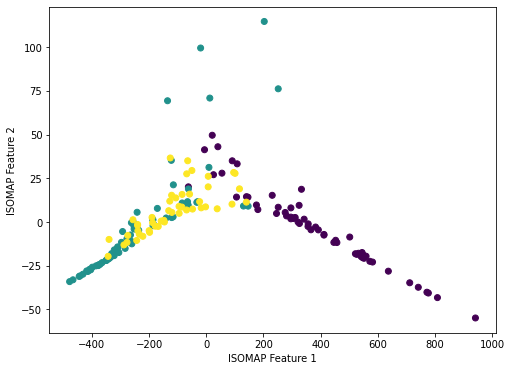

In [132]:
plt.figure(figsize = (8, 6))
plt.scatter(data_isomap[:,0], data_isomap[:,1], c = wine['target'])
plt.xlabel('ISOMAP Feature 1')
plt.ylabel('ISOMAP Feature 2')

## **UMAP**

installing umap and importing it.

In [133]:
!pip install umap-learn

In [134]:
import umap

umap = umap.UMAP(n_neighbors = 5, random_state = 0)
data_umap = umap.fit(data.values)

Text(0, 0.5, 'ISOMAP Feature 2')

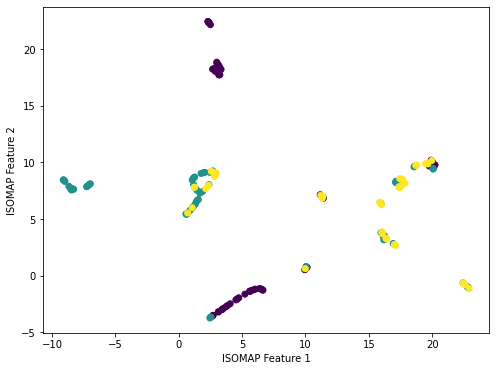

In [135]:
plt.figure(figsize = (8, 6))
plt.scatter(data_umap.embedding_[:,0], data_umap.embedding_[:,1], c = wine['target'])
plt.xlabel('ISOMAP Feature 1')
plt.ylabel('ISOMAP Feature 2')

# **Image Data**

## **loading the image dataset from sk learn**

In [136]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person = 30)
faces.data.shape

(2370, 2914)

In [137]:
X = faces.data
Y = faces.target

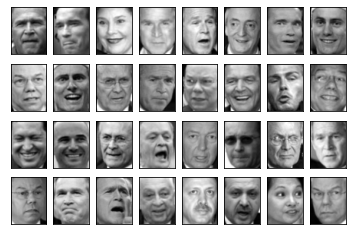

In [138]:
fig, ax = plt.subplots(4, 8, subplot_kw = dict(xticks = [], yticks = []))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap = 'gray')

## **PCA**

In [139]:
from sklearn.decomposition import PCA

pca = PCA(2)
image_pca_data = pca.fit_transform(X)

we can see that for 2 components only 34% of the variance is covered and we lose a lot of features.

In [140]:
np.cumsum(pca.explained_variance_ratio_ * 100)

array([21.44157 , 34.140648], dtype=float32)

Text(0, 0.5, 'PCA Feature 2')

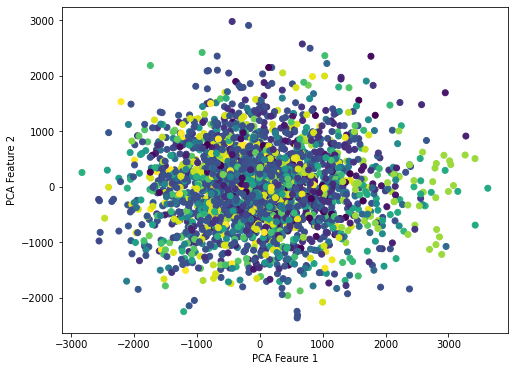

In [141]:
plt.figure(figsize = (8, 6))
plt.scatter(image_pca_data[:,0], image_pca_data[:,1], c = Y)
plt.xlabel('PCA Feaure 1')
plt.ylabel('PCA Feature 2')

## **SVD**

In [142]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD()
data_svd = svd.fit_transform(X)

In [143]:
np.cumsum(svd.explained_variance_ratio_ * 100)[1]

33.454967

Text(0, 0.5, 'SVD Feature 2')

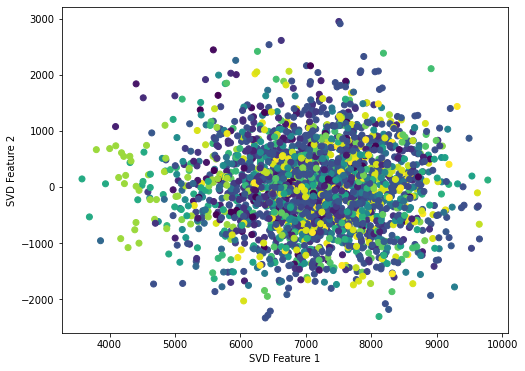

In [144]:
plt.figure(figsize = (8, 6))
plt.scatter(data_svd[:,0], data_svd[:,1], c = Y)
plt.xlabel('SVD Feature 1')
plt.ylabel('SVD Feature 2')

In [145]:
# plt.plot(np.cumsum(svd.explained_variance_ratio_))
# plt.xlabel('Number of Components')
# plt.ylabel('Explained Variance')

## **LLE**

In [146]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components = 2, n_neighbors = 10, method = "modified")
data_lle = lle.fit_transform(X)

Text(0, 0.5, 'LLE Feature 2')

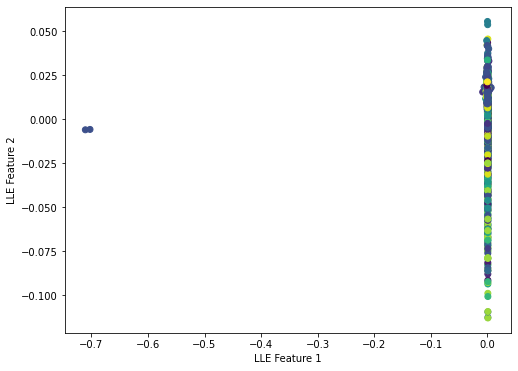

In [147]:
plt.figure(figsize = (8, 6))
plt.scatter(data_lle[:,0], data_lle[:,1], c = Y)
plt.xlabel('LLE Feature 1')
plt.ylabel('LLE Feature 2')

## **t-SNE**

In [148]:
from sklearn.manifold import TSNE

tsne = TSNE()
data_tsne = tsne.fit_transform(X)

Text(0, 0.5, 'TSNE Feature 2')

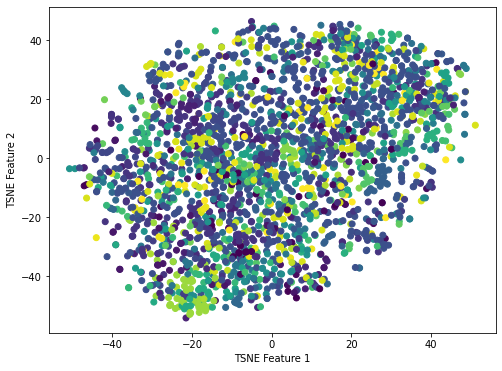

In [149]:
plt.figure(figsize = (8, 6))
plt.scatter(data_tsne[:,0], data_tsne[:,1], c = Y)
plt.xlabel('TSNE Feature 1')
plt.ylabel('TSNE Feature 2')

## **ISOMAP**

In [150]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components = 2)
data_isomap = isomap.fit_transform(X)

Text(0, 0.5, 'ISOMAP Feature 2')

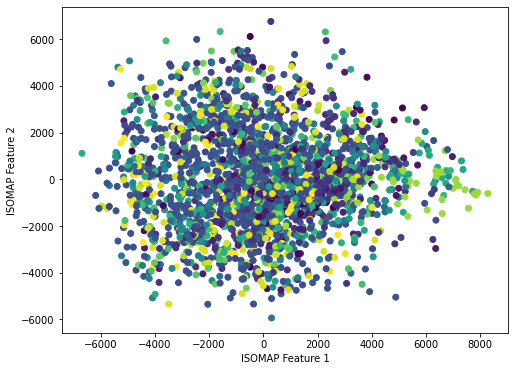

In [151]:
plt.figure(figsize = (8, 6))
plt.scatter(data_isomap[:,0], data_isomap[:,1], c = Y)
plt.xlabel('ISOMAP Feature 1')
plt.ylabel('ISOMAP Feature 2')

## **UMAP**

In [152]:
import umap

umap = umap.UMAP(n_neighbors = 5, random_state = 0)
data_umap = umap.fit_transform(X)
# data_temp = umap.fit(X)

Text(0, 0.5, 'UMAP Feature 2')

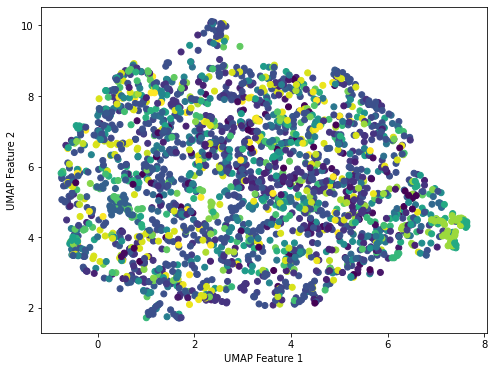

In [153]:
plt.figure(figsize = (8, 6))
plt.scatter(data_umap[:,0], data_umap[:,1], c = Y)
# plt.scatter(data_umap.embedding_[:,0], data_umap.embedding_[:,1], c = Y)
plt.xlabel('UMAP Feature 1')
plt.ylabel('UMAP Feature 2')